In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from google.colab import files
import io
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

In [ ]:
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['inspection2023_Ver2.csv']))

Saving inspection2023_Ver2.csv to inspection2023_Ver2 (1).csv


In [ ]:
df.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,pop_sqkm,num_crime_in2021,Hispanic or Latino,white,Black or African American,American Indian,Asian,Hawaiian,other,new_cuisine
0,50088158,XIANG HOTPOT,Brooklyn,5816,FORT HAMILTON PARKWAY,11219,7188515888,Chinese,2023-02-13,Violations were cited in the following area(s).,...,13647.151487,1930,0.123917,0.605269,0.012608,0.001138,0.2347,0.0,0.016946,Chinese
1,50131276,WHATSUP CAFE,Brooklyn,6609,FORT HAMILTON PARKWAY,11219,7187907666,Asian/Asian Fusion,2023-03-23,Violations were cited in the following area(s).,...,13647.151487,1930,0.123917,0.605269,0.012608,0.001138,0.2347,0.0,0.016946,Asian
2,50052708,PARC OASIS,Brooklyn,6403,11 AVENUE,11219,9292922010,Seafood,2023-02-23,Violations were cited in the following area(s).,...,13647.151487,1930,0.123917,0.605269,0.012608,0.001138,0.2347,0.0,0.016946,Meat
3,41028194,SAI'S CAFE,Brooklyn,6003,FORT HAMILTON PARKWAY,11219,6463611524,Bakery Products/Desserts,2023-02-28,Violations were cited in the following area(s).,...,13647.151487,1930,0.123917,0.605269,0.012608,0.001138,0.2347,0.0,0.016946,Bakery/Dessert
4,50049290,ORCHIDEA RESTAURANT,Brooklyn,4815,12 AVENUE,11219,7186867500,Jewish/Kosher,2023-02-06,Violations were cited in the following area(s).,...,13647.151487,1930,0.123917,0.605269,0.012608,0.001138,0.2347,0.0,0.016946,Jewish


In [ ]:
df.shape

(9259, 45)

In [ ]:
df.columns

Index(['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE',
       'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION', 'VIOLATION CODE',
       'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE', 'GRADE',
       'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE', 'Latitude', 'Longitude',
       'Community Board', 'Council District', 'Census Tract', 'BIN', 'BBL',
       'NTA', 'Location Point1', 'cuisine', 'num_foodDO', 'median income',
       'pop_over25', 'bachelor_higher', 'prop_bachelor', 'POPULATION',
       'area_sqkm', 'pop_sqkm', 'num_crime_in2021', 'Hispanic or Latino',
       'white', 'Black or African American', 'American Indian', 'Asian',
       'Hawaiian', 'other', 'new_cuisine'],
      dtype='object')

In [ ]:
features = ['num_foodDO','median income','prop_bachelor','pop_sqkm','num_crime_in2021','Hispanic or Latino','white', 'Black or African American', 'American Indian', 'Asian','Hawaiian', 'other', 'new_cuisine']
X = df.loc[:,features]
Y = df['GRADE']

X = pd.get_dummies(X, columns=['new_cuisine'])

print(X.shape)
print(Y.shape)

(9259, 70)
(9259,)


In [ ]:
from sklearn.preprocessing import StandardScaler

cont_features = X.loc[:,'num_foodDO':'other']
dummies = X.loc[:,'new_cuisine_Afghan':]
cols = cont_features.columns

scaler = StandardScaler()
stand = scaler.fit_transform(cont_features)
stand_features = pd.DataFrame(stand, columns=cols)

X_standard = pd.concat([stand_features,dummies], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_standard, Y, test_size=0.2)

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test, y_pred)

In [ ]:
print('The accuracy score for KNN is', acc)

The accuracy score for KNN is 0.8131749460043196


In [ ]:
k_values = [i for i in range (1,31)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train, y_train, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

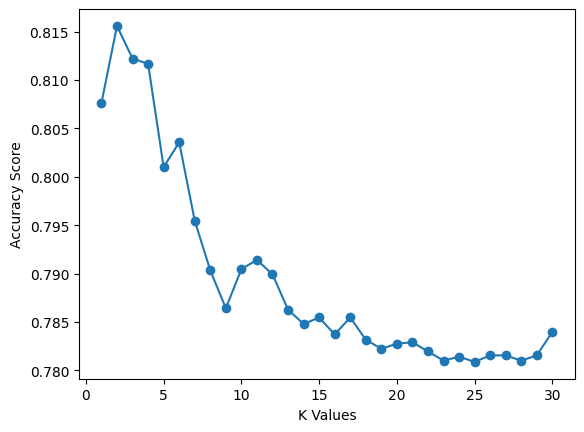

In [ ]:
plt.plot(k_values, scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [ ]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=50)

In [ ]:
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('The accuracy score for KNN is', acc)

The accuracy score for KNN is 0.8218142548596112


In [ ]:
best_k

2

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.85      0.96      0.90      1440
           B       0.63      0.35      0.45       265
           C       0.63      0.35      0.45       147

    accuracy                           0.82      1852
   macro avg       0.70      0.55      0.60      1852
weighted avg       0.80      0.82      0.80      1852



In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(knn, X_test, y_test, n_repeats=10, random_state=42)
importances = result.importances_mean

feature_importances = dict(zip(X.columns, importances))

sorted_importances = sorted(feature_importances.items(), key=lambda x: abs(x[1]), reverse=True)

print("Top 10 most important features:")
for feature, importance in sorted_importances[:10]:
    print(f"{feature}: {importance}")

Top 10 most important features:
median income: 0.0026997840172786392
American Indian: 0.002699784017278617
Black or African American: 0.002537796976241924
new_cuisine_Fast Food: 0.0023218142548596223
pop_sqkm: 0.002159827213822907
prop_bachelor: 0.0021058315334773316
Asian: 0.0019438444924406272
num_crime_in2021: 0.001781857451403901
white: 0.0016198704103671524
num_foodDO: 0.001565874730021588


In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_res, y_train_res)

y_pred = knn.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('The accuracy score for KNN is', acc)

The accuracy score for KNN is 0.5431965442764579


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.90      0.50      0.64      1440
           B       0.28      0.67      0.39       265
           C       0.26      0.73      0.39       147

    accuracy                           0.54      1852
   macro avg       0.48      0.64      0.47      1852
weighted avg       0.76      0.54      0.59      1852

